# SalesDataAnaylsis by "Ahmad Raza"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sales_data.csv')

In [3]:
df.head()

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950


# Handle Null Values

In [4]:
df.isnull().sum()

Order Date          0
Order ID            0
Product             0
Product_ean         0
catégorie           0
Purchase Address    0
Quantity Ordered    0
Price Each          0
Cost price          0
turnover            0
margin              0
dtype: int64

In [5]:
#check data types of each feature and also check null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order Date        185950 non-null  object 
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Product_ean       185950 non-null  float64
 4   catégorie         185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Quantity Ordered  185950 non-null  int64  
 7   Price Each        185950 non-null  float64
 8   Cost price        185950 non-null  float64
 9   turnover          185950 non-null  float64
 10  margin            185950 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 15.6+ MB


# Feature Engineering

In [6]:
#we split our date feature to month and year
df['Order Date'].head(1)

0    2019-01-22 21:25:00
Name: Order Date, dtype: object

In [7]:
df['Order Year']=df['Order Date'].str.split(' ').str[0].str.split('-').str[0]

In [8]:
df['Order Month']=df['Order Date'].str.split(' ').str[0].str.split('-').str[1]

In [9]:
df.head(1)

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin,Order Year,Order Month
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.0,231.0,700.0,469.0,2019,01


In [10]:
df['Purchase Address'].head(1)

0    944 Walnut St, Boston, MA 02215
Name: Purchase Address, dtype: object

In [11]:
#we  need only cities not all address
df['Purchase City']=df['Purchase Address'].str.split(',').str[1]

In [12]:
df.head(1)

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin,Order Year,Order Month,Purchase City
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.0,231.0,700.0,469.0,2019,01,Boston


In [13]:
#drop 
df.drop(columns={'Order Date','Order ID','Product_ean','Purchase Address'},axis=1,inplace=True)

In [14]:
df.head(1)

,Product,catégorie,Quantity Ordered,Price Each,Cost price,turnover,margin,Order Year,Order Month,Purchase City
0,iPhone,Vêtements,1,700.0,231.0,700.0,469.0,2019,01,Boston


# Handle Number of Unique values

In [15]:
#there are many unique values we need to minimize this to smaller unique walues
df['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [16]:
#we make a def funtion to minimize our unique values to lower
def change(x):
    if x in ['USB-C Charging Cable','Lightning Charging Cable']:
        return 'Charging Cables'
    elif x in ['AAA Batteries (4-pack)','AA Batteries (4-pack)']:
        return 'Batteries'
    elif x in ['Wired Headphones','Apple Airpods Headphones','Bose SoundSport Headphones']:
        return 'Headphones'
    elif x in ['27in FHD Monitor','27in 4K Gaming Monitor','34in Ultrawide Monitor','Flatscreen TV','20in Monitor']:
        return 'Smart Tv'
    elif x in ['iPhone','Google Phone','Vareebadd Phone']:
        return 'Smart Phones'
    elif x in ['Macbook Pro Laptop','ThinkPad Laptop']:
        return 'Laptops'
    elif x in ['LG Washing Machine','LG Dryer']:
        return 'Cleaning Machines'
    else:
        return 'Others'

In [17]:
df['Product'] = df['Product'].apply(change)

In [18]:
df['Product'].value_counts()

Headphones           47756
Charging Cables      43561
Batteries            41218
Smart Tv             28819
Smart Phones         14432
Laptops               8852
Cleaning Machines     1312
Name: Product, dtype: int64

In [19]:
df.head(1)

,Product,catégorie,Quantity Ordered,Price Each,Cost price,turnover,margin,Order Year,Order Month,Purchase City
0,Smart Phones,Vêtements,1,700.0,231.0,700.0,469.0,2019,01,Boston


In [20]:
#convert french language faeature to english for better understanding
df.rename(columns={'catégorie':'Category'},inplace=True)

In [21]:
df.head(1)

,Product,Category,Quantity Ordered,Price Each,Cost price,turnover,margin,Order Year,Order Month,Purchase City
0,Smart Phones,Vêtements,1,700.0,231.0,700.0,469.0,2019,01,Boston


In [22]:
df['Category'].value_counts()

Sports          46925
Vêtements       46405
Alimentation    46342
Électronique    46278
Name: Category, dtype: int64

In [23]:
#same as change fature data french to english for better understanding
data_mapping = {
    'Vêtements': 'Clothes',
    'Électronique': 'Electronics'
}
df['Category'] = df['Category'].map(data_mapping).fillna(df['Category'])

In [24]:
df['Category'].value_counts()

Sports          46925
Clothes         46405
Alimentation    46342
Electronics     46278
Name: Category, dtype: int64

In [25]:
#check data types of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Product           185950 non-null  object 
 1   Category          185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Cost price        185950 non-null  float64
 5   turnover          185950 non-null  float64
 6   margin            185950 non-null  float64
 7   Order Year        185950 non-null  object 
 8   Order Month       185950 non-null  object 
 9   Purchase City     185950 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 14.2+ MB


In [26]:
#convert float data to int for minimize our data to low 
df['Order Month'] = df['Order Month'].astype(int)
df['Order Year'] = df['Order Year'].astype(int)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Product           185950 non-null  object 
 1   Category          185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Cost price        185950 non-null  float64
 5   turnover          185950 non-null  float64
 6   margin            185950 non-null  float64
 7   Order Year        185950 non-null  int32  
 8   Order Month       185950 non-null  int32  
 9   Purchase City     185950 non-null  object 
dtypes: float64(4), int32(2), int64(1), object(3)
memory usage: 12.8+ MB


In [28]:
df.head()

,Product,Category,Quantity Ordered,Price Each,Cost price,turnover,margin,Order Year,Order Month,Purchase City
0,Smart Phones,Clothes,1,700.00,231.0000,700.00,469.0000,2019,1,Boston
1,Charging Cables,Alimentation,1,14.95,7.4750,14.95,7.4750,2019,1,Portland
2,Headphones,Clothes,2,11.99,5.9950,23.98,11.9900,2019,1,San Francisco
3,Smart Tv,Sports,1,149.99,97.4935,149.99,52.4965,2019,1,Los Angeles
4,Headphones,Electronics,1,11.99,5.9950,11.99,5.9950,2019,1,Austin


# Exploratary Data Analysis

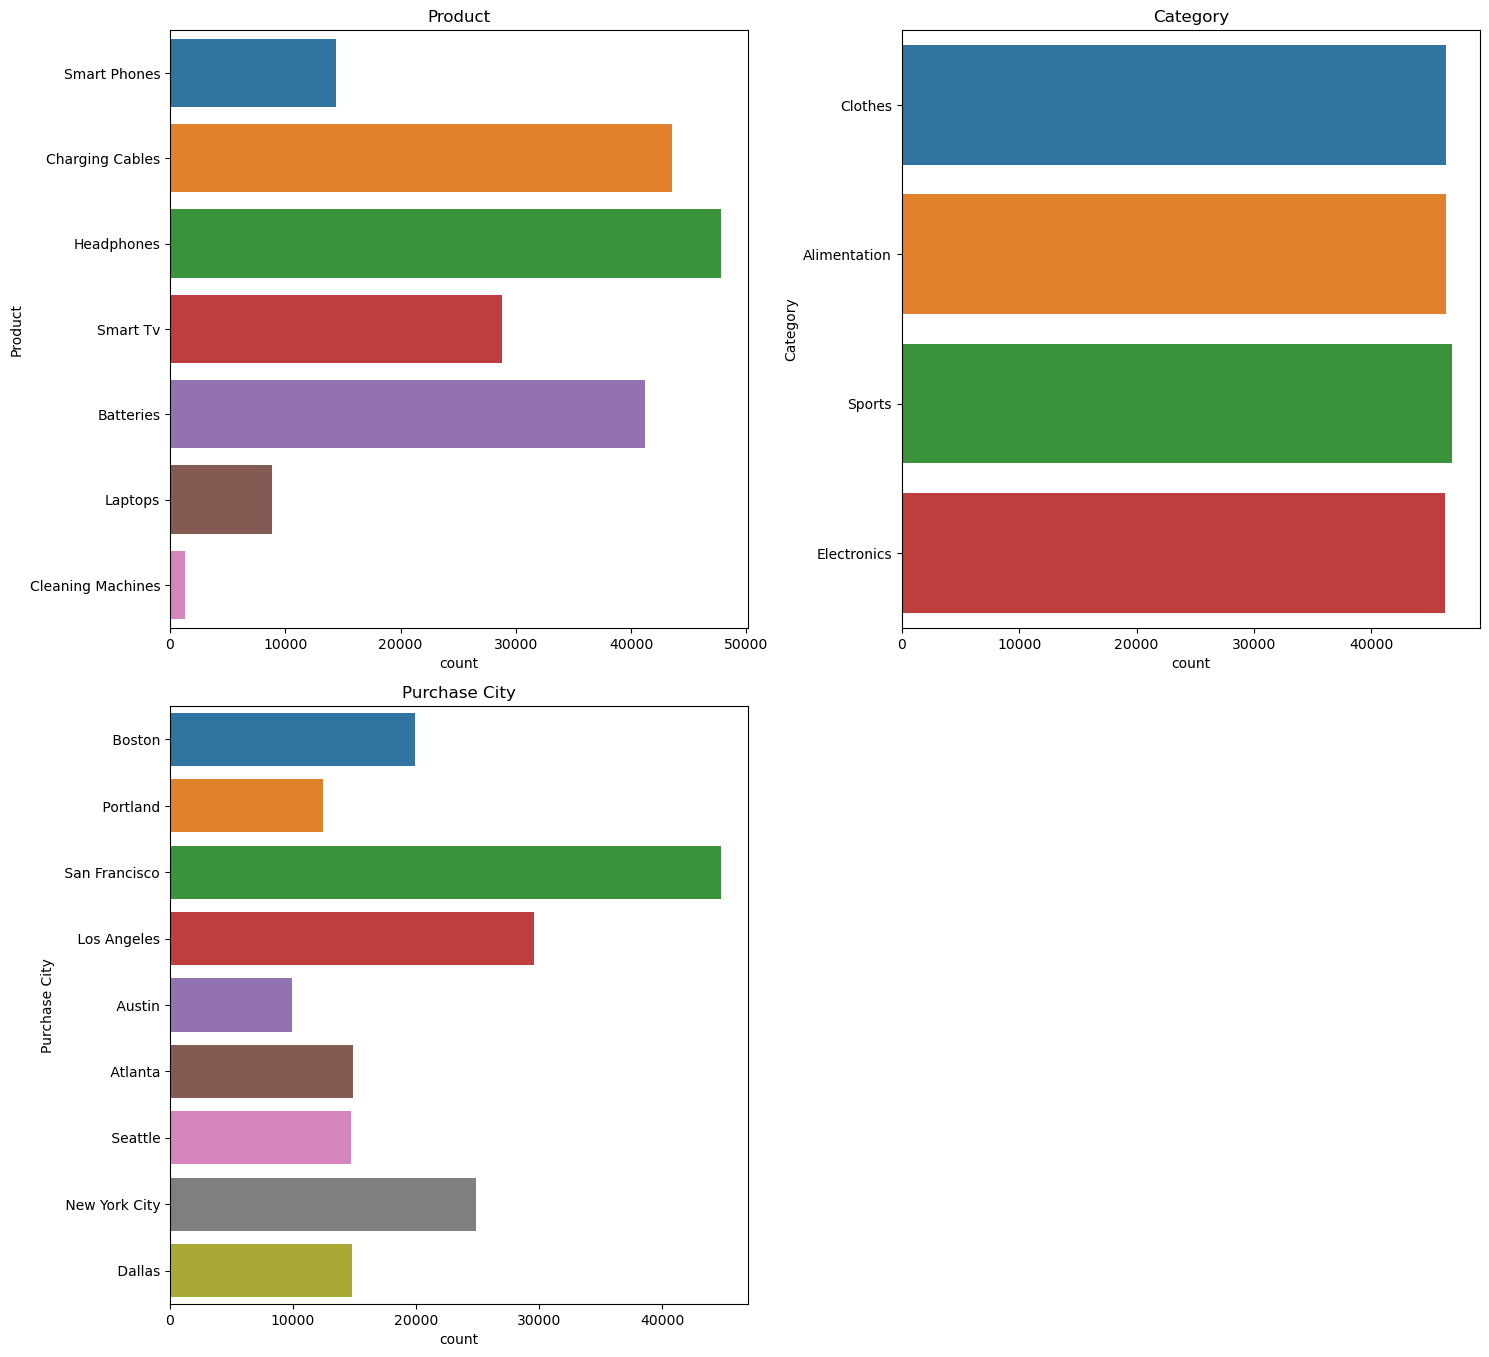

In [29]:
#exploratary data analysis on category features
cat = df.select_dtypes(include='object').columns.tolist()
col = len(cat)

fig , axs = plt.subplots(nrows=col,ncols=2,figsize=(15,20))
axs = axs.flatten()

for i , var in enumerate (cat):
    sns.countplot(y=var,data=df,ax=axs[i])
    axs[i].set_title(var)
        
if col < len(axs):
    for i in range(col, len(axs)):
        fig.delaxes(axs[i])        

fig.tight_layout()
plt.show()

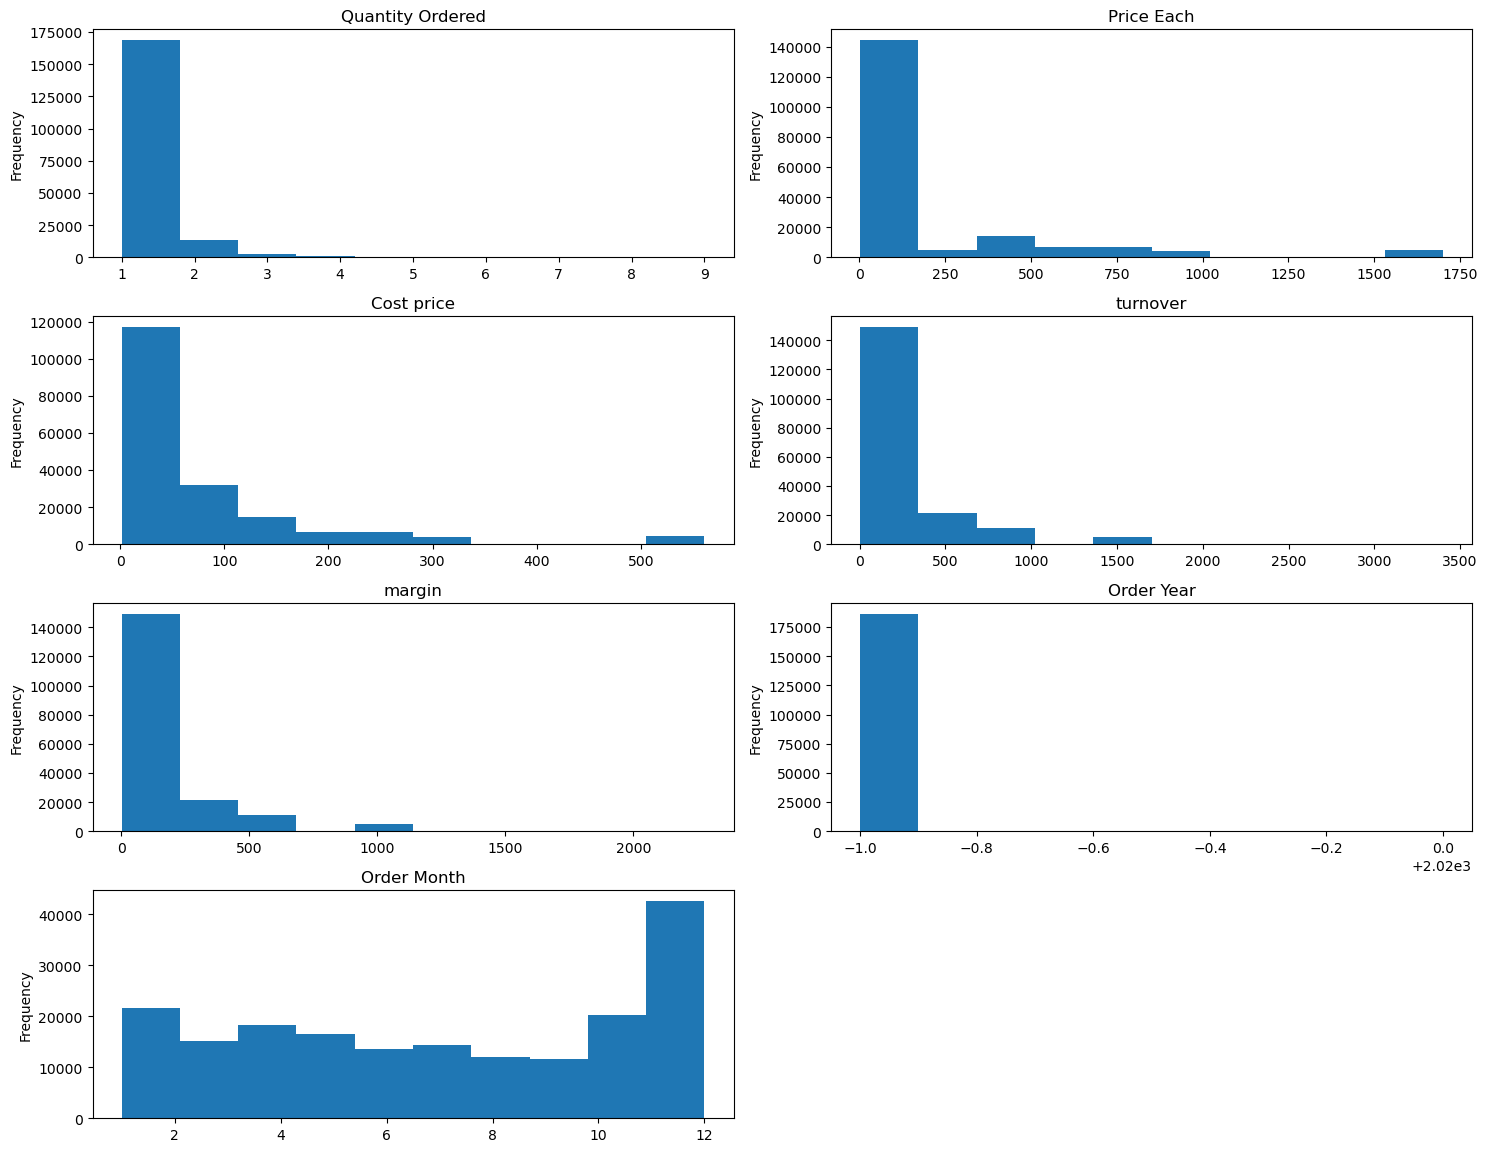

In [30]:
#exploratary data analysis on numerical or continuous features
num = df.select_dtypes(include=['int','float']).columns.tolist()
col = len(num)

fig , axs = plt.subplots(nrows=col,ncols=2,figsize=(15,20))
axs = axs.flatten()

for i , var in enumerate (num):
    df[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)
        
if col < len(axs):
    for i in range(col, len(axs)):
        fig.delaxes(axs[i])        

fig.tight_layout()
plt.show()

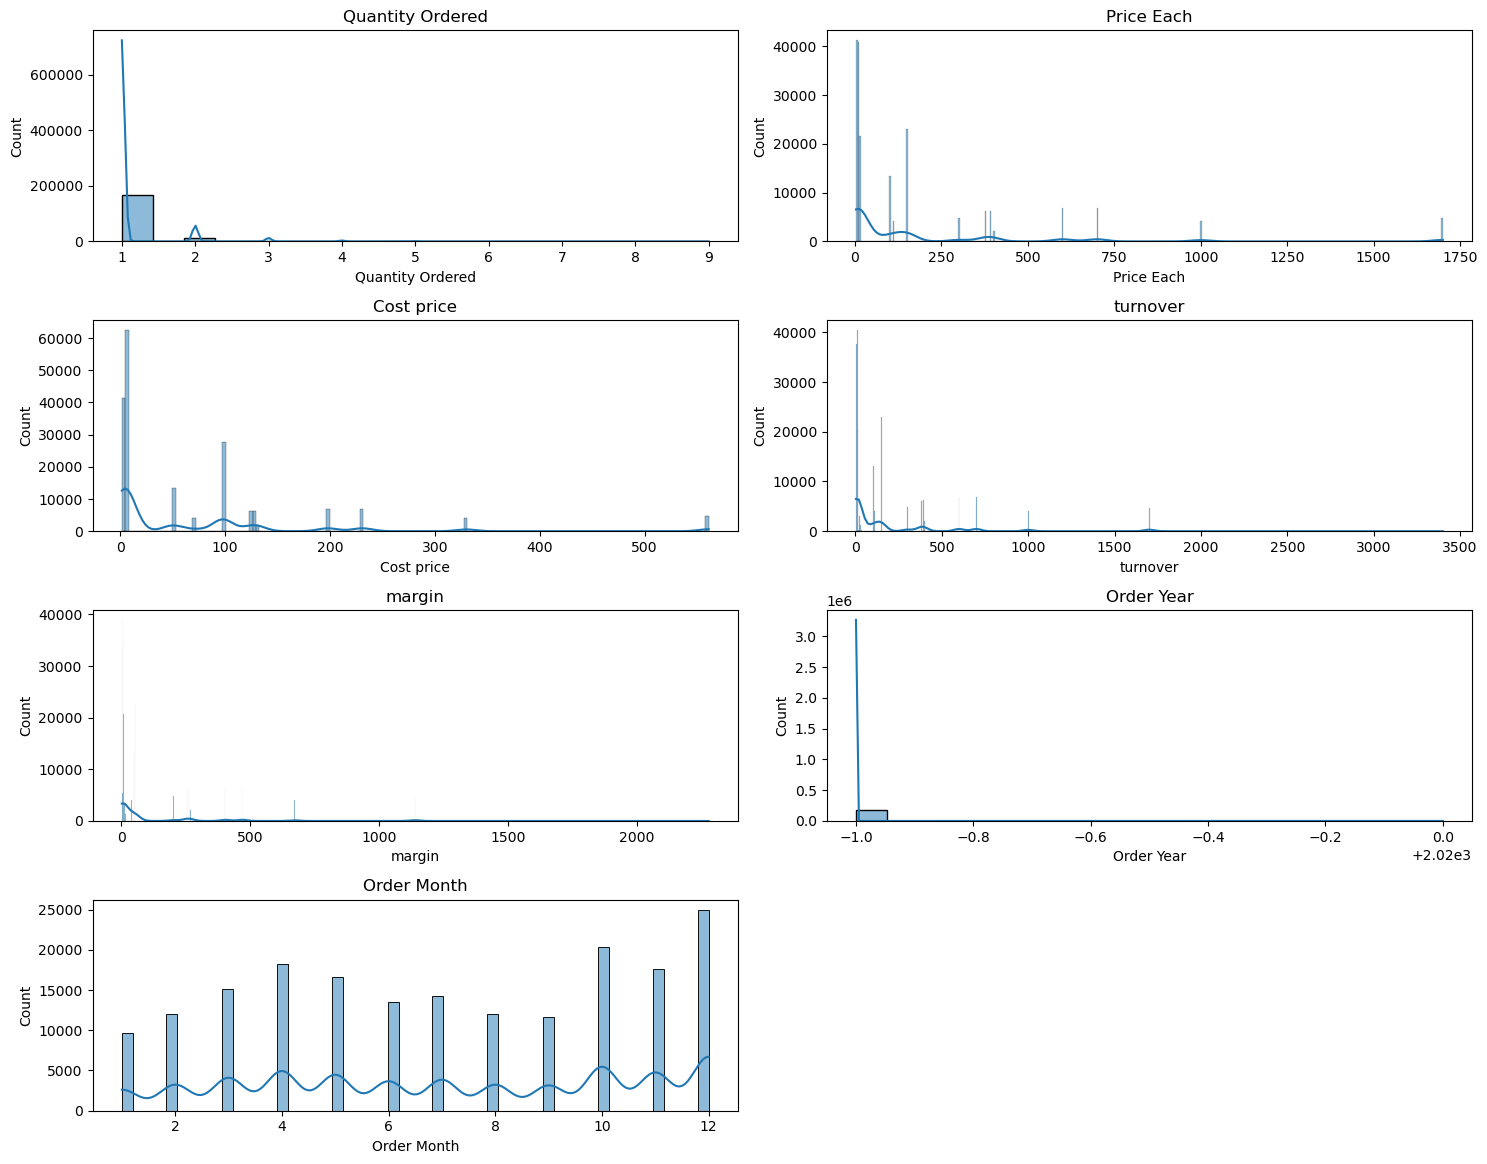

In [31]:
#exploratary data anaylsis with kde(kernal density estimation)
num = df.select_dtypes(include=['int','float']).columns.tolist()
col = len(num)

fig , axs = plt.subplots(nrows=col,ncols=2,figsize=(15,20))
axs = axs.flatten()

for i , var in enumerate (num):
    sns.histplot(data=df,x=var,kde=True,ax=axs[i])
    axs[i].set_title(var)
        
if col < len(axs):
    for i in range(col, len(axs)):
        fig.delaxes(axs[i])        

fig.tight_layout()
plt.show()

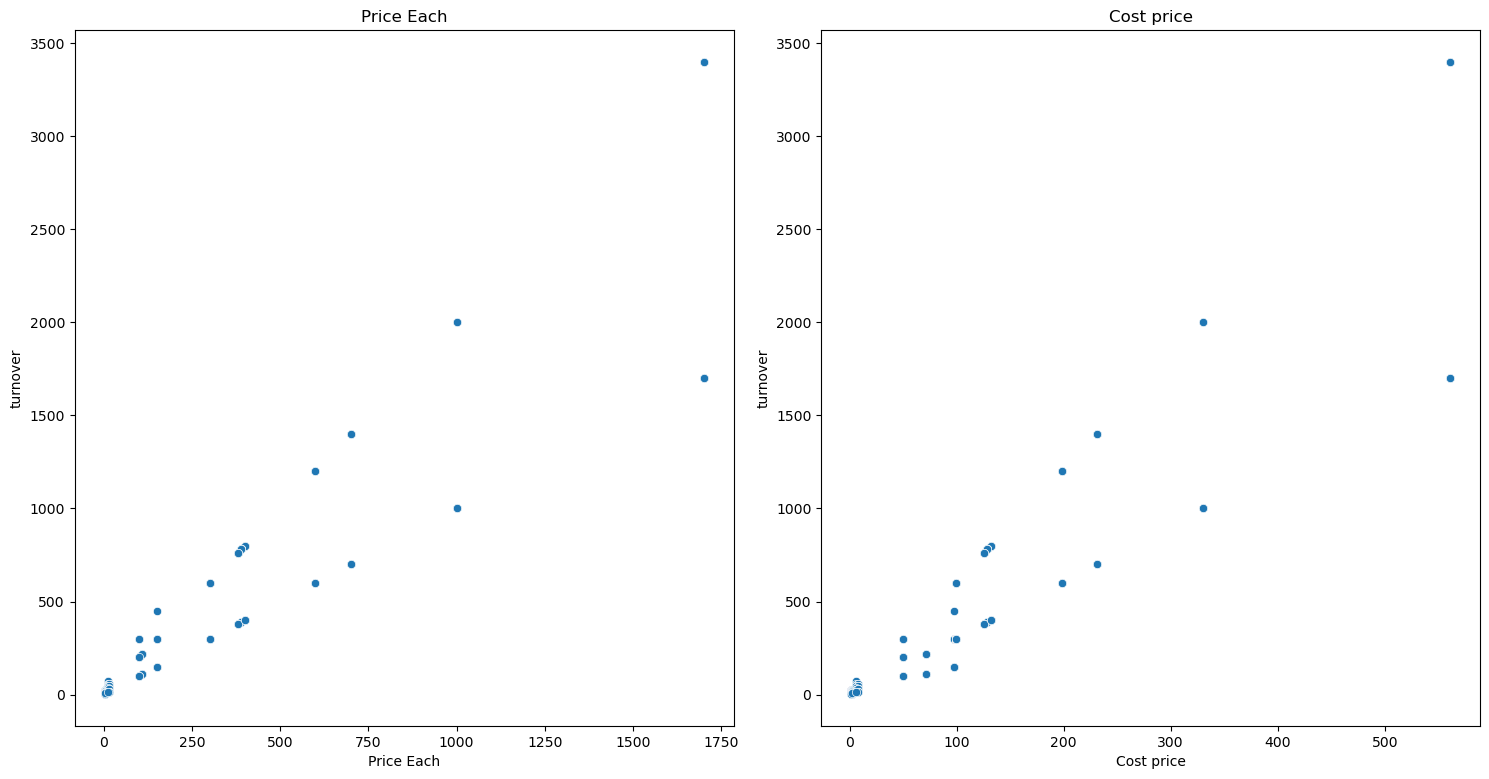

In [32]:
#using scatter plot to tells relation between 2 independent feature
num = ['Price Each','Cost price']
col = len(num)

fig , axs = plt.subplots(nrows=col,ncols=2,figsize=(15,15))
axs = axs.flatten()

for i , var in enumerate (num):
    sns.scatterplot(x=var,y='turnover',data=df,ax=axs[i])
    axs[i].set_title(var)
        
if col < len(axs):
    for i in range(col, len(axs)):
        fig.delaxes(axs[i])        

fig.tight_layout()
plt.show()

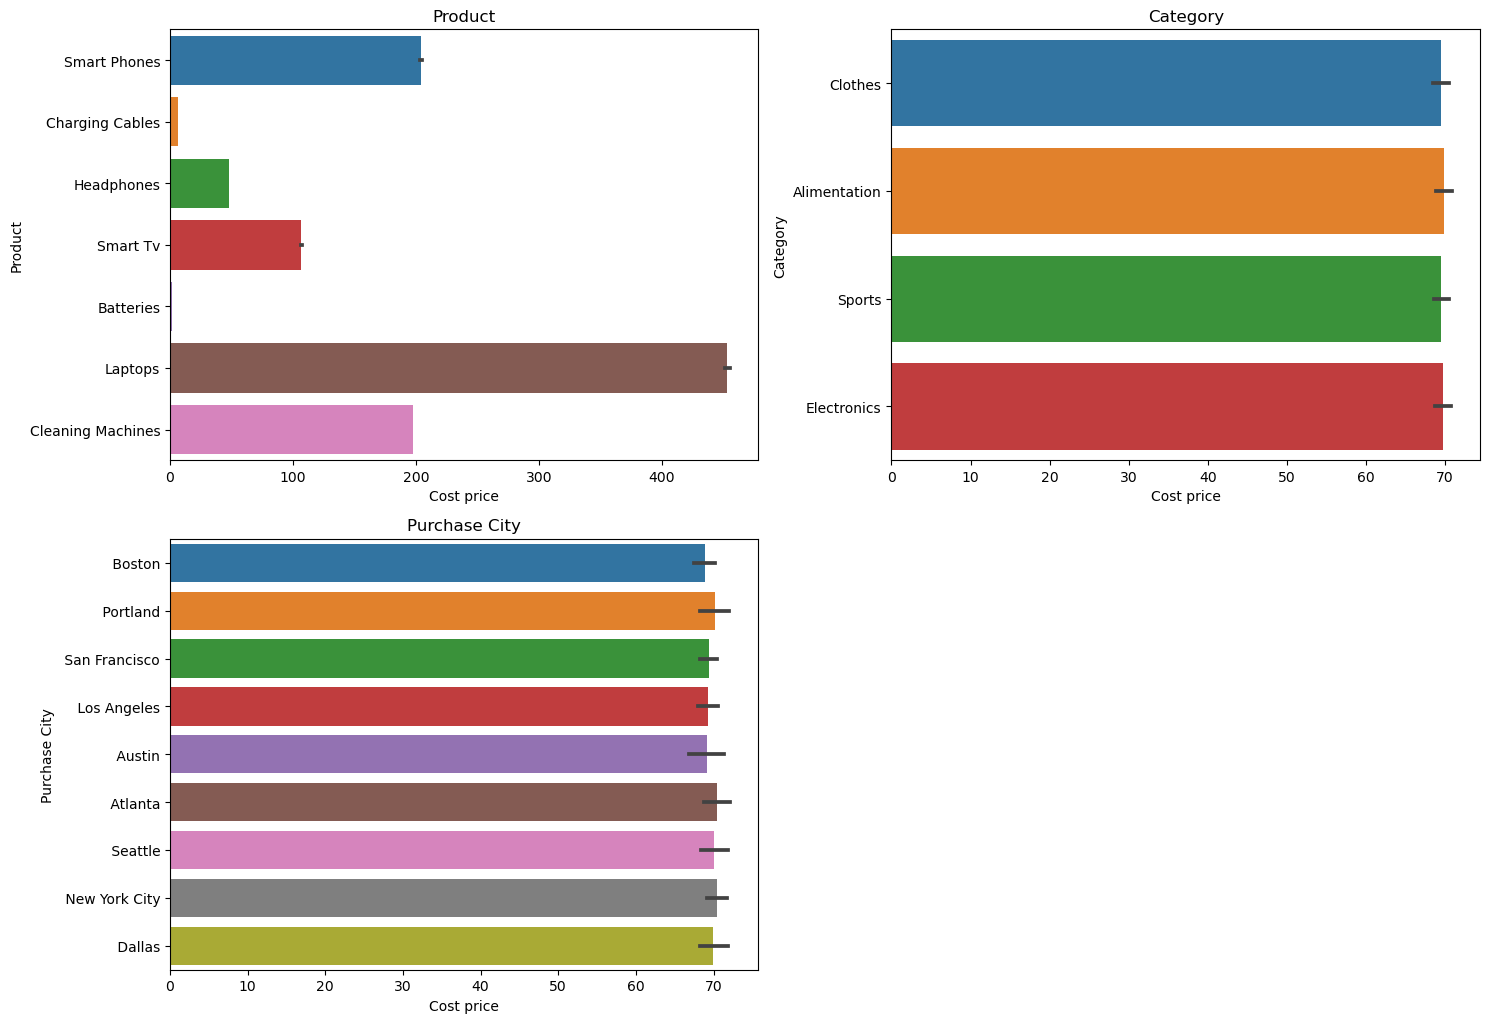

In [36]:
#eda using dependent feature cost price
cat = ['Product','Category','Purchase City']
col = len(cat)
fig, axs = plt.subplots(nrows=col,ncols=2,figsize=(15,15))
axs = axs.flatten()

for i, var in enumerate (cat):
    sns.barplot(x='Cost price', y=var, data=df, ax=axs[i])
    axs[i].set_title(var)
    
if col < len(axs):
    for i in range(col, len(axs)):
        fig.delaxes(axs[i])        

fig.tight_layout()
plt.show()